In [1]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt  
import seaborn as sns



In [2]:
data = pd.read_csv(r"..\data\raw_data.csv")  

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns


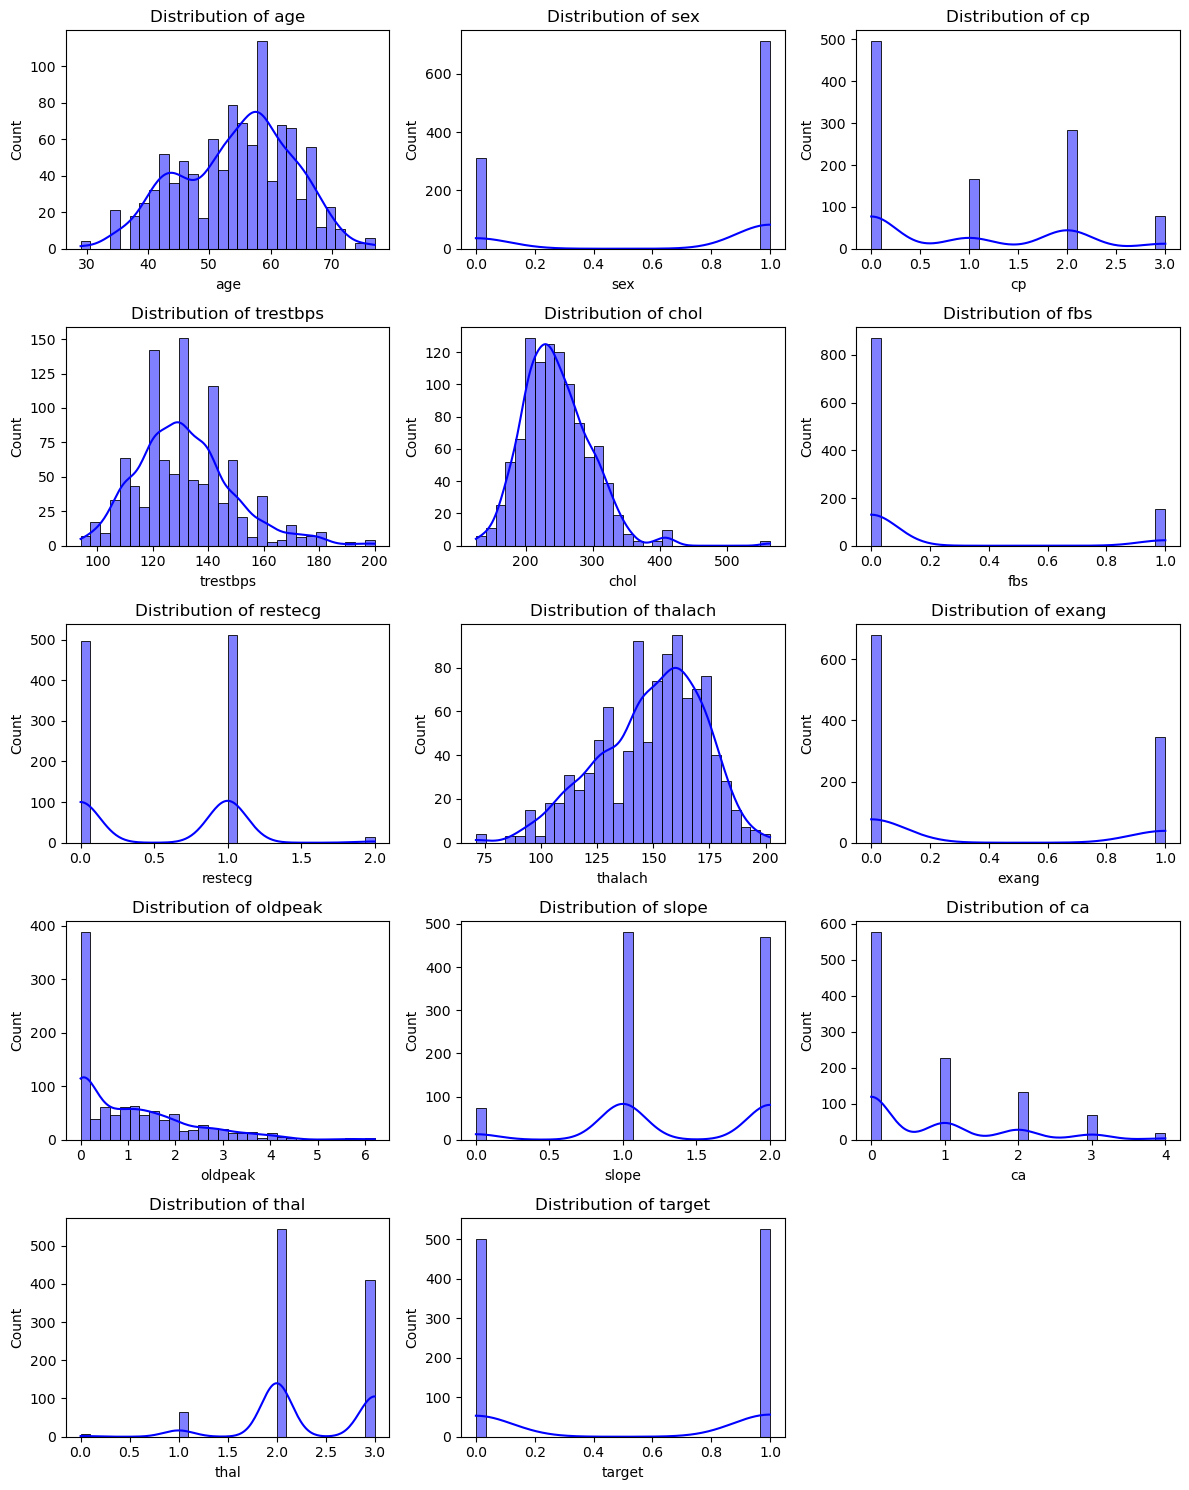

In [3]:
import math

num_features = len(numerical_features) # Number of features
rows = math.ceil(num_features / 3)  #Automatically calculate the number of rows
cols = 3  #Three columns

plt.figure(figsize=(12, rows * 3))  # Automatically adjust shape size

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)  # Using dynamic values
    sns.histplot(data[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


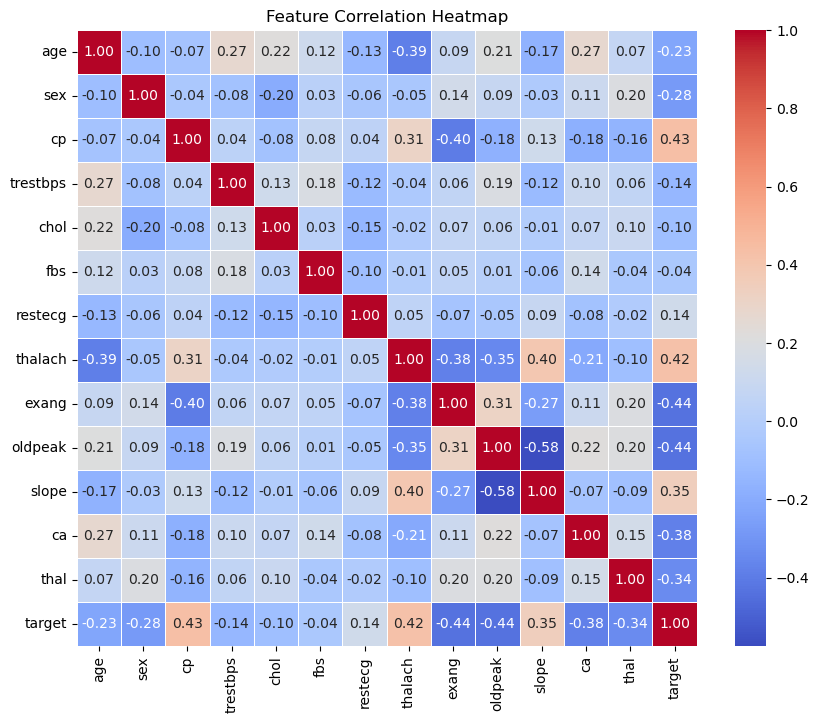

In [4]:
# Correlation matrix calculation
correlation_matrix = data.corr()

# Draw a Heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

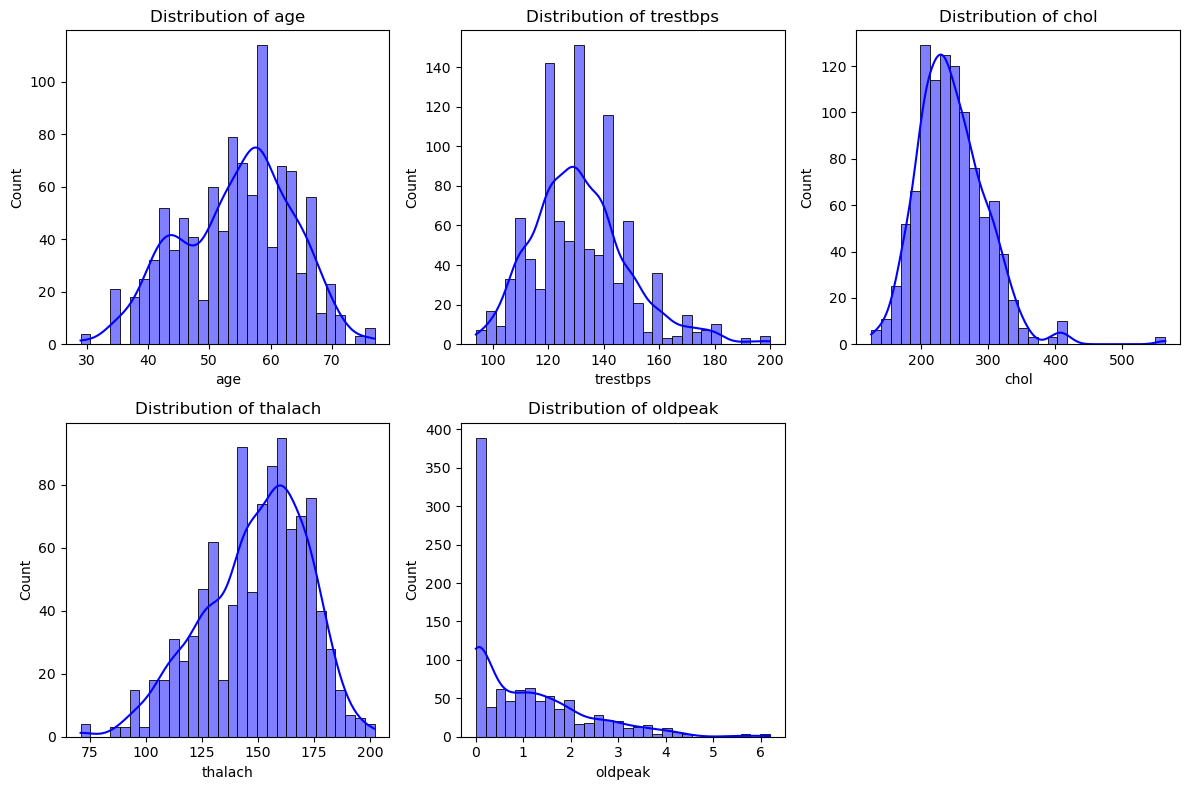

In [5]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Distribution plot using Histogram
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  #Divide the drawing into 2 rows and 3 columns
    sns.histplot(data[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

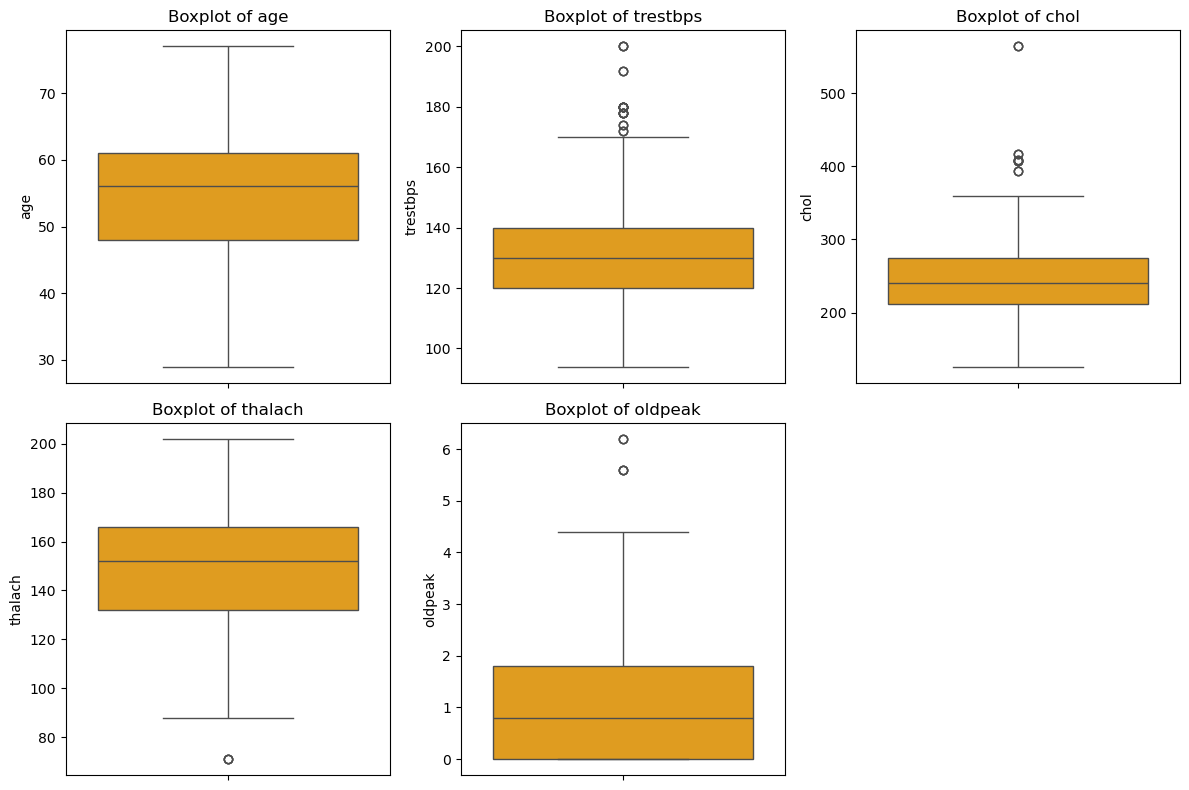

In [6]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature], color="orange")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Separate the data into features (X) and targets (y)

X = data[numerical_features]  
y = data["target"]  #Target column (cardiac injury)

# Random Forest Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract the importance of features
feature_importance = pd.Series(model.feature_importances_, index=numerical_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Heart Disease Prediction")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20756\600568925.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
